In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
#mengunduh file dalam bentuk zip sesuai peintah
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-07-27 04:33:47--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.11MB/s    in 63s     

2020-07-27 04:34:51 (4.88 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#mengekstraksi file zip yg sudah diunduh
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'scissors', 'paper']

In [ ]:
#mengecek banyaknya image pada masing-masing direktori
len(os.listdir('/tmp/rockpaperscissors/rock')) #batu

726

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/paper')) #kertas

712

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/scissors')) #gunting

750

In [ ]:
#membuat directory name
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(val_dir)

In [ ]:

# membuat direktori masing-masing sesuai nama bentuknya
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# memecah direktori menjadi data training dan data validation

# rock
training_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

# scissors
training_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

#paper
training_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

In [ ]:
# memindahkan data training dan validation sesuai dengan nama bentuknya
training_scissors = os.path.join(train_dir, 'scissors')
training_rock = os.path.join(train_dir, 'rock')
training_paper = os.path.join(train_dir, 'paper')
val_scissors = os.path.join(val_dir, 'scissors')
val_rock = os.path.join(val_dir, 'rock')
val_paper = os.path.join(val_dir, 'paper')

In [ ]:
# membuat direktori baru sesuai dengan data training dan validation
if not os.path.exists(training_rock):
  os.mkdir(training_rock)
if not os.path.exists(training_paper):
  os.mkdir(training_paper)
if not os.path.exists(training_scissors):
  os.mkdir(training_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:

# menyalin data train dan data val ke directory baru
import shutil

for i in training_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(training_rock, i))
for i in training_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(training_paper,i))
for i in training_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(training_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [ ]:
# membuat objek ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

valid_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# membuat model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(3, activation = 'softmax')

])

In [ ]:

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy']
              )

In [ ]:

# pelatihan model
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = valid_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 48s - loss: 1.0126 - accuracy: 0.5075 - val_loss: 0.9373 - val_accuracy: 0.6313
Epoch 2/20
25/25 - 44s - loss: 0.6686 - accuracy: 0.7212 - val_loss: 0.4110 - val_accuracy: 0.8375
Epoch 3/20
25/25 - 44s - loss: 0.3630 - accuracy: 0.8775 - val_loss: 0.3430 - val_accuracy: 0.8938
Epoch 4/20
25/25 - 43s - loss: 0.3050 - accuracy: 0.8913 - val_loss: 0.2840 - val_accuracy: 0.8938
Epoch 5/20
25/25 - 44s - loss: 0.2130 - accuracy: 0.9275 - val_loss: 0.2455 - val_accuracy: 0.9312
Epoch 6/20
25/25 - 43s - loss: 0.1828 - accuracy: 0.9337 - val_loss: 0.1346 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 43s - loss: 0.1710 - accuracy: 0.9450 - val_loss: 0.1698 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 43s - loss: 0.1314 - accuracy: 0.9575 - val_loss: 0.3264 - val_accuracy: 0.9062
Epoch 9/20
25/25 - 43s - loss: 0.1247 - accuracy: 0.9613 - val_loss: 0.1971 - val_accuracy: 0.9625
Epoch 10/20
25/25 - 43s - loss: 0.1022 - accuracy: 0.9737 - val_loss: 0.1706 - val_accuracy: 0.9375
Epoch 11/

Using TensorFlow backend.


Saving tangan.jpg to tangan.jpg
tangan.jpg
 Gambar Kertas


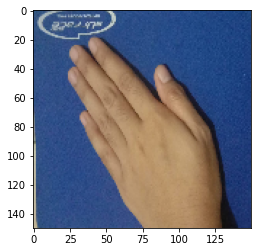

In [ ]:
# membuat pengujian sebuah file yang dimasukkan kedalam machine
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print(' Gambar Kertas')
  elif classes[0,1]!=0:
    print('Gambar Batu')
  else:
    print('Gambar Gunting ')